# Week 3. Boston housing example
Cognitive Systems for Health Technology Applications<br>
Juha Kopu & Sakari Lukkarinen, 31.1.2018<br>
Helsinki Metropolia University of Applied Sciences<br>

Based on Chollet's book and material: [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python)

In [1]:
from keras.datasets import boston_housing

# Download the data

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s     


In [2]:
print(test_targets)

[  7.2  18.8  19.   27.   22.2  24.5  31.2  22.9  20.5  23.2  18.6  14.5
  17.8  50.   20.8  24.3  24.2  19.8  19.1  22.7  12.   10.2  20.   18.5
  20.9  23.   27.5  30.1   9.5  22.   21.2  14.1  33.1  23.4  20.1   7.4
  15.4  23.8  20.1  24.5  33.   28.4  14.1  46.7  32.5  29.6  28.4  19.8
  20.2  25.   35.4  20.3   9.7  14.5  34.9  26.6   7.2  50.   32.4  21.6
  29.8  13.1  27.5  21.2  23.1  21.9  13.   23.2   8.1   5.6  21.7  29.6
  19.6   7.   26.4  18.9  20.9  28.1  35.4  10.2  24.3  43.1  17.6  15.4
  16.2  27.1  21.4  21.5  22.4  25.   16.6  18.6  22.   42.8  35.1  21.5
  36.   21.9  24.1  50.   26.7  25. ]


In [3]:
# Prepare the data

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

partial_train_data = train_data[:300]
partial_train_targets = train_targets[:300]
val_data = train_data[300:]
val_targets = train_targets[300:]

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [5]:
history = model.fit(partial_train_data, partial_train_targets,
                    epochs=200, batch_size=1, verbose=0,
                    validation_data = (val_data, val_targets))

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


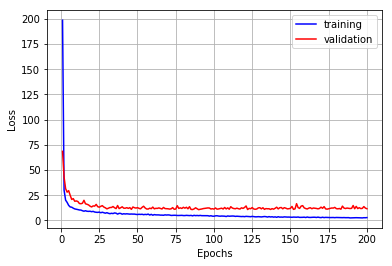

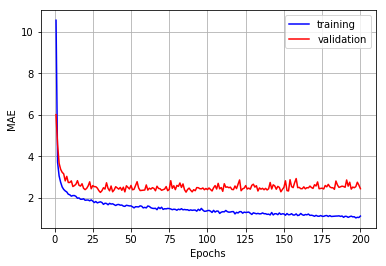

In [6]:
import matplotlib.pyplot as plt

print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

plt.plot(time, loss, 'b-', label = 'training')
plt.plot(time, val_loss, 'r-', label = 'validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

#plt.clf()
plt.plot(time, mae, 'b-', label = 'training')
plt.plot(time, val_mae, 'r-', label = 'validation')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid()
plt.show()

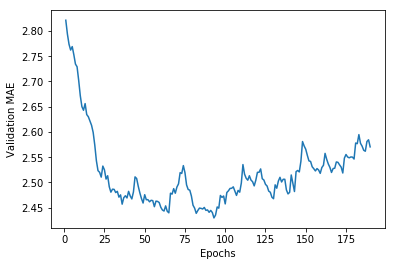

In [7]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae = smooth_curve(mae[10:])
smooth_val_mae = smooth_curve(val_mae[10:])

plt.plot(range(1, len(smooth_val_mae) + 1), smooth_val_mae)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [8]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model.fit(train_data, train_targets,
                    epochs=90, batch_size=15, verbose=0)

In [9]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

 32/102 [========>.....................] - ETA: 0s

In [10]:
test_mae_score

2.555418566161511

In [11]:
test_targets

array([  7.2,  18.8,  19. ,  27. ,  22.2,  24.5,  31.2,  22.9,  20.5,
        23.2,  18.6,  14.5,  17.8,  50. ,  20.8,  24.3,  24.2,  19.8,
        19.1,  22.7,  12. ,  10.2,  20. ,  18.5,  20.9,  23. ,  27.5,
        30.1,   9.5,  22. ,  21.2,  14.1,  33.1,  23.4,  20.1,   7.4,
        15.4,  23.8,  20.1,  24.5,  33. ,  28.4,  14.1,  46.7,  32.5,
        29.6,  28.4,  19.8,  20.2,  25. ,  35.4,  20.3,   9.7,  14.5,
        34.9,  26.6,   7.2,  50. ,  32.4,  21.6,  29.8,  13.1,  27.5,
        21.2,  23.1,  21.9,  13. ,  23.2,   8.1,   5.6,  21.7,  29.6,
        19.6,   7. ,  26.4,  18.9,  20.9,  28.1,  35.4,  10.2,  24.3,
        43.1,  17.6,  15.4,  16.2,  27.1,  21.4,  21.5,  22.4,  25. ,
        16.6,  18.6,  22. ,  42.8,  35.1,  21.5,  36. ,  21.9,  24.1,
        50. ,  26.7,  25. ])

In [12]:
model.predict(test_data)

array([[  8.51075935],
       [ 19.37778282],
       [ 22.02940178],
       [ 37.47798538],
       [ 24.58499146],
       [ 22.10845757],
       [ 27.53865242],
       [ 21.5566864 ],
       [ 19.59493828],
       [ 22.45480156],
       [ 22.3760891 ],
       [ 17.18226051],
       [ 17.15392494],
       [ 42.54439163],
       [ 21.10009956],
       [ 20.52051735],
       [ 27.38691139],
       [ 19.41604424],
       [ 19.36937904],
       [ 27.96311951],
       [ 12.56919956],
       [ 16.19843864],
       [ 20.93481445],
       [ 15.62245655],
       [ 19.19792366],
       [ 24.94295502],
       [ 29.60551834],
       [ 29.84623146],
       [ 11.7730999 ],
       [ 20.05293274],
       [ 20.55406952],
       [ 15.24023628],
       [ 34.28307724],
       [ 25.48818779],
       [ 18.46919632],
       [  9.18696594],
       [ 16.7876873 ],
       [ 18.86404228],
       [ 20.26579475],
       [ 26.2577343 ],
       [ 32.14387512],
       [ 27.53946114],
       [ 14.03886604],
       [ 43

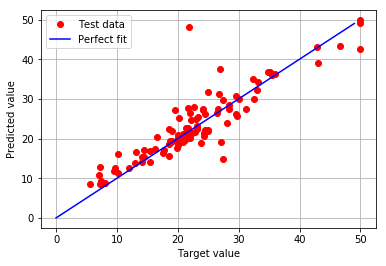

In [18]:
x = test_targets
y = model.predict(test_data)

from numpy import arange

x0 = arange(0, 50)
y0 = x0

plt.plot(x, y, 'ro', label = 'Test data')
plt.plot(x0, y0, 'b-', label = 'Perfect fit')
plt.xlabel('Target value')
plt.ylabel('Predicted value')
plt.legend()
plt.grid()
plt.show()